STOCK MARKET PREDICTION

In [1]:
!pip install pandas_datareader

In [2]:
import pandas_datareader as pdr
import datetime

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
df = yf.download('AAPL', start ='2015-05-27', end = '2020-05-22')
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_19592\2950931758.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start ='2015-05-27', end = '2020-05-22')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-27,29.572575,29.621848,29.126883,29.191832,183332800
2015-05-28,29.514353,29.552427,29.362057,29.532271,122933200
2015-05-29,29.178396,29.440437,29.093288,29.391164,203538000
2015-06-01,29.236626,29.426999,29.126884,29.178396,128451200
2015-06-02,29.106733,29.263509,28.963395,29.084335,134670400


In [5]:
df.to_csv('AAPL_stock_data.csv')

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('AAPL_stock_data.csv')

In [8]:
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2015-05-27,29.572574615478516,29.621847584620834,29.12688287295774,29.191831740938717,183332800
3,2015-05-28,29.514352798461914,29.552426754903117,29.36205697269711,29.532270557515968,122933200
4,2015-05-29,29.178396224975586,29.440436986994744,29.093287742153812,29.39116401456765,203538000


In [9]:
data= data.iloc[2:].reset_index(drop=True)

In [10]:
data.head()

,Price,Close,High,Low,Open,Volume
0,2015-05-27,29.572574615478516,29.621847584620834,29.12688287295774,29.191831740938717,183332800
1,2015-05-28,29.514352798461914,29.552426754903117,29.36205697269711,29.532270557515968,122933200
2,2015-05-29,29.178396224975586,29.440436986994744,29.093287742153812,29.39116401456765,203538000
3,2015-06-01,29.23662567138672,29.426998825554183,29.12688412242206,29.17839553147613,128451200
4,2015-06-02,29.106733322143555,29.26350943361036,28.963394674879204,29.08433527016419,134670400


In [11]:
data.tail()

,Price,Close,High,Low,Open,Volume
1252,2020-05-15,74.77883911132812,74.82501298410193,72.95620965856679,72.9902356348415,166348400
1253,2020-05-18,76.54071044921875,76.9149590881701,75.41311427356375,76.10571491448931,135178400
1254,2020-05-19,76.09843444824219,77.40586118201702,76.06684101530527,76.55773324993602,101729600
1255,2020-05-20,77.57842254638672,77.6488922301891,76.91984026254961,76.95872392411307,111504800
1256,2020-05-21,77.00000762939453,77.98179927461916,76.76184808396121,77.4398682042287,102688800


In [12]:
df1= data.reset_index()['Close']

In [13]:
df1.shape

(1257,)

In [14]:
df1

0       29.572574615478516
1       29.514352798461914
2       29.178396224975586
3        29.23662567138672
4       29.106733322143555
               ...        
1252     74.77883911132812
1253     76.54071044921875
1254     76.09843444824219
1255     77.57842254638672
1256     77.00000762939453
Name: Close, Length: 1257, dtype: object

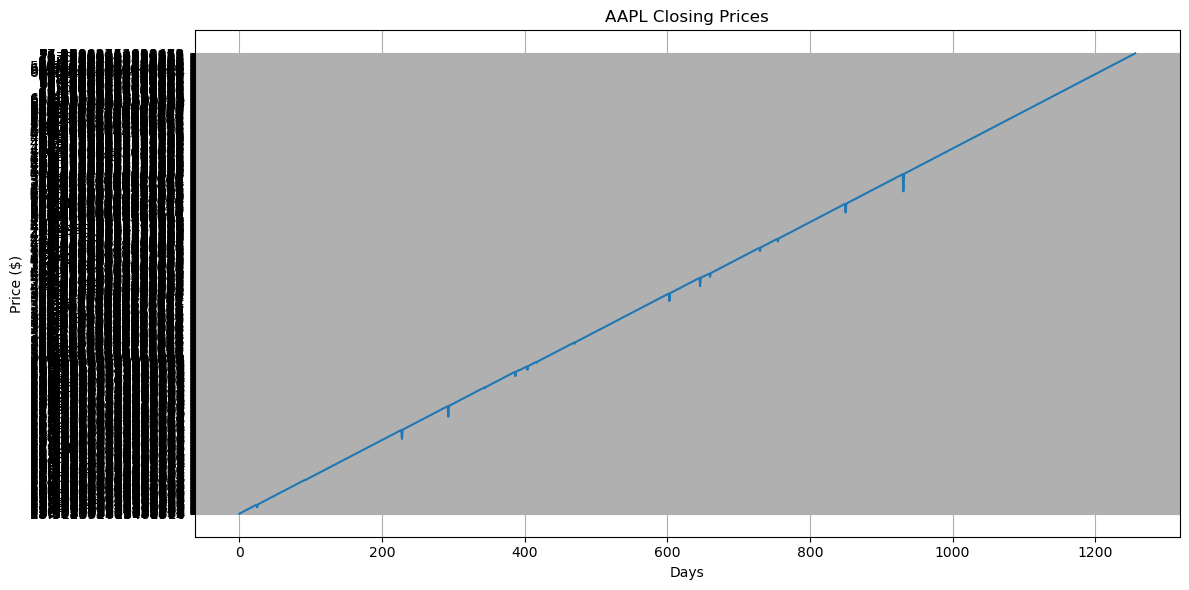

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(df1)
plt.title("AAPL Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
df1 = df1.astype(float)

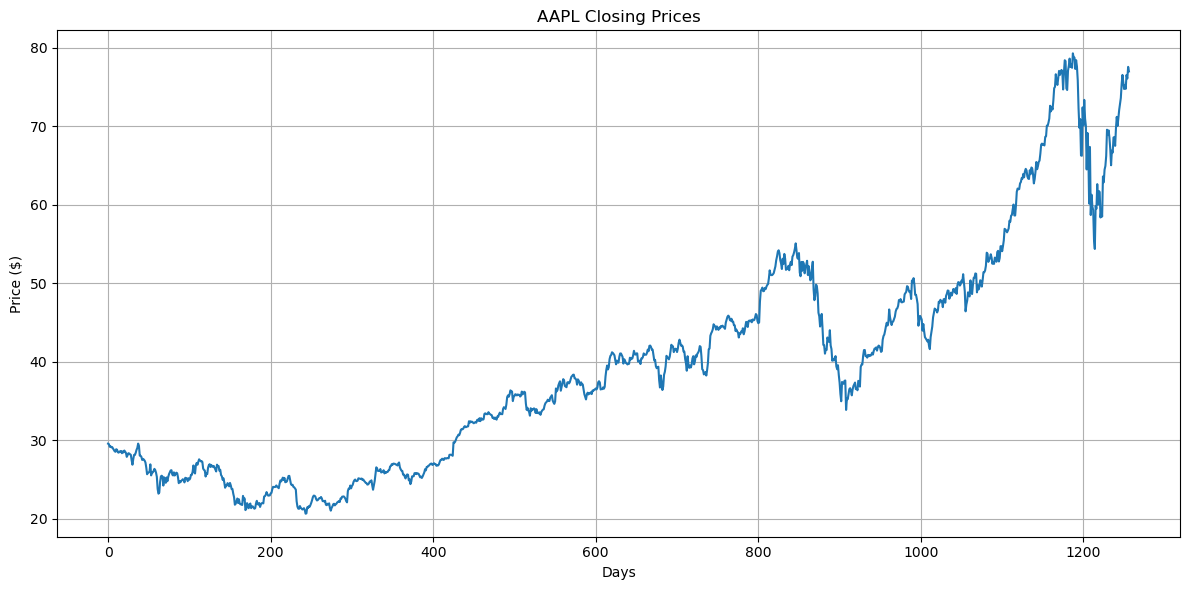

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df1)
plt.title("AAPL Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
import numpy as np

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1.shape

(1257, 1)

In [21]:
 df1

array([[0.15216772],
       [0.15117507],
       [0.14544722],
       ...,
       [0.94540495],
       [0.97063784],
       [0.96077622]])

SPLITTING THE DATASET INTO TRAIN TEST SPLIT

In [22]:
trainning_size = int(len(df1)*0.65)
test_size = len(df1)-trainning_size
train_data,test_data= df1[0:trainning_size,:],df1[trainning_size:len(df1),:1]

In [23]:
trainning_size,test_size

(817, 440)

In [24]:
import numpy
#converting array of value into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX, dataY =[],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [25]:
time_step = 100
x_train , y_train = create_dataset(train_data,time_step)
x_test ,y_test= create_dataset(test_data,time_step)

In [29]:
print(x_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [30]:
print(x_train.shape),print(y_test.shape)

(716, 100)
(339,)


(None, None)

In [33]:
!pip install tensorflow

In [37]:
# reshape input to be [samples, time steps , features] which is requried for LSTM

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [39]:
#Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [41]:
model= Sequential()
model.add(LSTM(50,return_sequences = True , input_shape=(100,1)))
model.add(LSTM(50,return_sequences =True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.fit(x_train, y_train , validation_data = (x_test,y_test),epochs = 100, batch_size = 64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step - loss: 0.0240 - val_loss: 0.0625
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.0040 - val_loss: 0.0050
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 9.3576e-04 - val_loss: 0.0044
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 8.5886e-04 - val_loss: 0.0060
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 6.2851e-04 - val_loss: 0.0067
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 5.6356e-04 - val_loss: 0.0053
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 5.6838e-04 - val_loss: 0.0053
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 5.7355e-04 - val_loss: 0.0045
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 5.5594e-04 - val_loss: 0.0037
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 5.6474e-04 - val_loss: 0.0037
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 5.8385e-04 - val_loss: 0.0038
Epoch

In [63]:
import tensorflow as tf

In [64]:
# Lets do the prediction and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [65]:
# transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [66]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

33.05609885177851

In [67]:
# test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

57.40725326017649

In [68]:
df1 = np.array(df1).reshape(-1, 1)

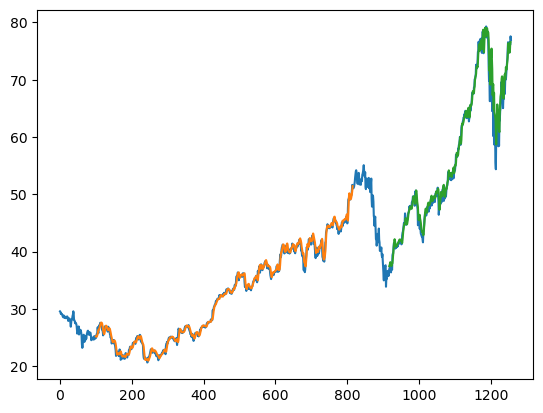

In [69]:
# ploting 
#shift train predictions for plotting
look_back =100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back : len(train_predict)+look_back, :] = train_predict

#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[...] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [70]:
len(test_data)

440

In [71]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [73]:
temp_input= list(x_input)
temp_input = temp_input[0].tolist()

In [74]:
temp_input

[0.8584946165087013,
 0.8861141445125564,
 0.8740768675867994,
 0.8838465213372082,
 0.8780341841624673,
 0.897821547499652,
 0.9243693754322806,
 0.9272544716308249,
 0.9545857501677741,
 0.9369421772024653,
 0.931418349647579,
 0.9474952815571949,
 0.9618825200664911,
 0.9529783951756456,
 0.9576364337180203,
 0.9639435818007533,
 0.9601512021944161,
 0.9215657071066077,
 0.9575954596286362,
 0.9850086863443537,
 0.9830709371076669,
 0.9238745645242887,
 0.9203704343848573,
 0.9623770708215347,
 0.9730952422220691,
 0.9885948947390277,
 0.9703724814633707,
 0.9766532240218337,
 0.9686368710676458,
 1.0,
 0.9903717393770852,
 0.9907023937745918,
 0.9661163792263838,
 0.9852064025851919,
 0.9714880173064147,
 0.9415302346017014,
 0.880086140543533,
 0.8383514940144823,
 0.8572354762381011,
 0.7781878727686884,
 0.7775269542030976,
 0.8826893610224089,
 0.8434752063346203,
 0.8989282381424482,
 0.8583511421576193,
 0.8422768117774881,
 0.7478169671818031,
 0.8270293775440722,
 0.7860805

In [82]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 99;
i=0
while(i<30):

    if(len(temp_input)>99):
        # print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format (i,x_input))
        x_input= x_input.reshape((1,n_steps,1))
        #print (x_input)
        yhat = model.predict(x_input , verbose = 0 )
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input =temp_input[1:]
        #print (temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input= x_input.reshape((1,n_steps,1))
        yhat= model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

0 day input [0.88611414 0.87407687 0.88384652 0.87803418 0.89782155 0.92436938
 0.92725447 0.95458575 0.93694218 0.93141835 0.94749528 0.96188252
 0.9529784  0.95763643 0.96394358 0.9601512  0.92156571 0.95759546
 0.98500869 0.98307094 0.92387456 0.92037043 0.96237707 0.97309524
 0.98859489 0.97037248 0.97665322 0.96863687 1.         0.99037174
 0.99070239 0.96611638 0.9852064  0.97148802 0.94153023 0.88008614
 0.83835149 0.85723548 0.77818787 0.77752695 0.88268936 0.84347521
 0.89892824 0.85835114 0.84227681 0.74781697 0.82702938 0.78608052
 0.67368684 0.796576   0.64881173 0.69281855 0.66724103 0.65943124
 0.5952184  0.57509479 0.66810864 0.66248914 0.71587584 0.67166239
 0.70087627 0.6987276  0.6434399  0.66005092 0.64550603 0.73252804
 0.71996662 0.74740397 0.75533747 0.77707234 0.83409552 0.82326926
 0.83260797 0.81653416 0.79227828 0.75690749 0.78884881 0.78442777
 0.81723631 0.81806295 0.79909663 0.8369053  0.8619873  0.84244266
 0.85934272 0.87752389 0.89020934 0.90306025 0.932

In [84]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [85]:
import matplotlib.pyplot as plt

In [86]:
len(df1)

1257

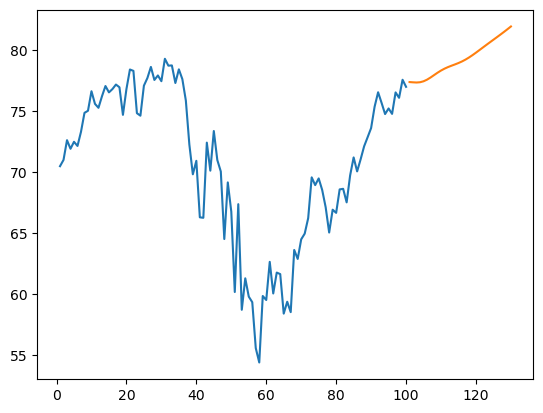

In [87]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

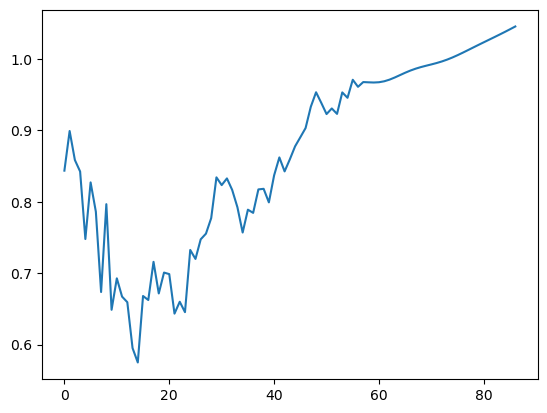

In [90]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])